In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd /content/gdrive/MyDrive/dissertation/apr/2

/content/gdrive/MyDrive/dissertation/apr/2


In [ ]:
!ls

aes_cbc_reviews2.csv  aes_cbc_TrainingData.csv


In [ ]:
# -*- coding: utf-8 -*-
# Load libraries
import numpy as np
from pickle import dump
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Conv1D, Flatten
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten, GlobalAveragePooling2D,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from keras.models import Model
import numpy as np
from numpy import loadtxt
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import pickle

In [ ]:
#Please add the validation datapath
url="aes_cbc_TrainingData.csv"

dataset=pd.read_csv(url)

In [ ]:
dataset.head()

,Unnamed: 0,Text,class
0,0,064318b398aa958640392c319b31452de2b1c6f7cad08f...,1
1,1,396120a49ac1377eb9ef2b6016c3699f337bda7475df0b...,0
2,2,abe0e3154be00d2d244bbb150eaaafeb02f16004c755ac...,0
3,3,e01a77cc3b69c393eaf987ed4c089a92d8fac5fbb5317b...,0
4,4,3a17c978bc9a1e7bb72419c7a9317f6c65d8d8a3feb520...,1


In [ ]:
dataset.columns = ['CID', 'Text', 'class']

In [ ]:
# dataset.drop(columns=['length'], axis=1, inplace=True)

In [ ]:
dataset = dataset.sample(frac=1)#shuffles the rows
dataset.head()

,CID,Text,class
9853,9853,64368725a2fa1eeba5b3d9ef4dbb3a0bc518b176cf00e9...,0
24671,24671,b47e8e9396437e75eeb481658a94610972af29972d681c...,1
36597,36597,446c4c8e9bede77f1d0ee5294612fafe3a6acc924e1c8a...,1
39408,39408,71e8c9c11995f7eed7148482276c9d5ce49fe38162d534...,0
5384,5384,792ce5b733075c392c87e67a72921e1e12d7b24cfb829e...,1


In [ ]:
arr4 = dataset['Text'].tolist()

arr1 = dataset['CID'].tolist()

arr2 = dataset['class'].tolist()

#print(arr2)

In [ ]:
set(arr2)

{0, 1}

In [ ]:
#random array of 5 elements
# np.random.randint(1,100,5)

array([72, 27, 10, 26, 61])

##Illustration of working of dataset.sample(frac=1).
Run the following two cells to see how rows are getting shuffled

In [ ]:
# data = {
#   "calories": np.random.randint(1,100,10),
#   "duration": np.random.randint(1,100,10),
#   "abcd": np.random.randint(1,100,10)
# }
# df = pd.DataFrame(data)
# df

,calories,duration,abcd
0,96,85,36
1,96,11,20
2,81,94,36
3,60,91,1
4,4,9,60
5,26,34,38
6,6,14,67
7,1,70,21
8,25,7,78
9,61,92,30


In [ ]:
# df = df.sample(frac=1)
# df

,calories,duration,abcd
1,96,11,20
6,6,14,67
7,1,70,21
2,81,94,36
3,60,91,1
8,25,7,78
0,96,85,36
5,26,34,38
9,61,92,30
4,4,9,60


In [ ]:
# dataset

,Unnamed: 0,CID,Text,class
16698,66641,66641,1d865c3024ab4a3a40fb8e0071db1cf1a16b5df773dd12...,0
13953,55487,55487,3e8bcd8520f93a618bb7ab41766b8afae09fd217094f72...,0
31322,45072,45072,c0622915c72bf31cda7d107b9d431a5baef33429c6685a...,1
19750,78750,78750,fa908bed98a4fd377db6f2770cafb70ea6f796df956d9a...,0
4355,16838,16838,cbc2eebcabcb47f7016314e29d31f24c10946baacbe384...,0
...,...,...,...,...
25725,22571,22571,6f6949cc56bc365dc1560c86d6b929a303b023283fc257...,1
5014,19358,19358,aa36f79e94c214bf6d19d9169b5295c07ec218f9a98b10...,0
22584,9944,9944,b4f082bee84a3a76f6d30877726eba74b60afba5e13629...,1
501,2162,2162,a207603c5e86e5c8bcdd6347f9872cb1387ca71ba6cca9...,0


In [ ]:
# int(arr4[0], 16)
len(arr4)

40018

In [ ]:
for i in range(len(arr4)):
  arr4[i] = int(arr4[i],16)#converting each of the text into hexadecimal format

li_of_li = []
for i in range(len(arr4)):
  str1 = str(arr4[i])
  n = 17
  chunks = [str1[i:i+n] for i in range(0, 17*4, n)]
  chunks.insert(0,arr1[i])#before chunks we are inserting CID
  chunks.append(arr2[i])#after chuncks, we are appending class-label
  li_of_li.append(chunks)

In [ ]:
len(li_of_li[0])

6

In [ ]:
# df = pd.DataFrame(li_of_li, columns = ['CID',
# 'Text1', 'Text2', 'Text3', 'Text4', 'Text5', 'Text6', 'Text7', 'Text8', 'Text9', 'Text10', 
# 'Text11', 'Text12', 'Text13', 'Text14', 'Text15', 'Text16', 'Text17', 'Text18', 'Text19', 'Text20',
# 'Text21', 'Text22', 'Text23', 'Text24', 'Text25', 'Text26', 'Text27', 'Text28', 'Text29', 'Text30', 
# 'Text31', 'Text32', 'Text33', 'Text34', 'Text35', 'Text36', 'Text37', 'Text38', 'Text39', 'Text40', 
# 'Text41', 'Text42', 'Text43', 'Text44', 'Text45', 'Text46', 'Text47', 'Text48', 'Text49', 'Text50', 
# 'Text51', 'Text52', 'Text53', 'Text54', 'Text55', 'Text56', 'Text57', 'Text58', 'Text59', 'Text60',
# 'Text61', 'Text62', 'Text63', 'Text64', 'Text65', 'Text66', 'Text67', 'Text68', 'Text69', 'Text70', 
# 'Text71', 'Text72', 'Text73', 'Text74', 'Text75', 'Text76', 'Text77', 'Text78', 'Text79', 'Text80', 
# 'Text81', 'Text82', 'Text83', 'Text84', 'Text85', 'Text86', 'Text87', 'Text88', 'Text89', 'Text90', 
# 'Text91', 'Text92', 'Text93', 'Text94', 'Text95', 'Text96', 'Text97', 'Text98', 'Text99', 'Text100',
# 'Text101', 'Text102', 'Text103', 'Text104', 'Text105', 'Text106', 'Text107', 'Text108', 'Text109', 'Text110', 
# 'Text111', 'Text112', 'Text113', 'Text114', 'Text115', 'Text116', 'Text117', 'Text118', 'Text119', 'Text120', 
# 'Text121', 'Text122', 'Text123', 'Text124', 'Text125', 'Text126', 'Text127', 'Text128', 'Text129', 'Text130',
# 'Text131', 'Text132', 'Text133', 'Text134', 'Text135', 'Text136', 'Text137', 'Text138', 'Text139', 'Text140', 
# 'Text141', 'Text142', 'Text143', 'Text144',
# 'class'])

df = pd.DataFrame(li_of_li, columns = ['CID', 'Text1', 'Text2', 'Text3', 'Text4', 'class'])



In [ ]:
df.head()

,CID,Text1,Text2,Text3,Text4,class
0,9853,68022001816517471,29675691345059161,97918874759314016,43097398526071860,0
1,24671,12251492251640634,16307245117341067,17380357456489065,21129421278842516,1
2,36597,46443798524580740,78357939982741934,35692791475705030,00224782902333691,1
3,39408,77318716899858011,84106059686342709,50360468287998111,20745571574275707,0
4,5384,82250725526686944,64283737311572575,68219476371406059,08816430255035384,1


In [ ]:
# df.dropna(inplace=True)

In [ ]:
df.head()

,CID,Text1,Text2,Text3,Text4,class
0,9853,68022001816517471,29675691345059161,97918874759314016,43097398526071860,0
1,24671,12251492251640634,16307245117341067,17380357456489065,21129421278842516,1
2,36597,46443798524580740,78357939982741934,35692791475705030,00224782902333691,1
3,39408,77318716899858011,84106059686342709,50360468287998111,20745571574275707,0
4,5384,82250725526686944,64283737311572575,68219476371406059,08816430255035384,1


In [ ]:
df['class'].value_counts()

0    20048
1    19970
Name: class, dtype: int64

In [ ]:
df.shape

(40018, 6)

In [ ]:
# pd.to_numeric(df['Text1'])

0        15626132868246133
1        38925343090821406
2        89956808283531519
3        12979615545913111
4        13851311479411140
               ...        
79995    27060565567665880
79996    13099299085135807
79997    10618172893481995
79998    50846257401899968
79999    16678243813221175
Name: Text1, Length: 80000, dtype: int64

In [ ]:
C1= pd.to_numeric(df['Text1']) 
C1=C1.to_numpy()
C2= pd.to_numeric(df['Text2']) 
C2=C2.to_numpy()
C3= pd.to_numeric(df['Text3']) 
C3=C3.to_numpy()
C4= pd.to_numeric(df['Text4']) 
C4=C4.to_numpy()
# C5= pd.to_numeric(df['Text5']) 
# C5=C5.to_numpy()
# C6= pd.to_numeric(df['Text6']) 
# C6=C6.to_numpy()
# C7= pd.to_numeric(df['Text7']) 
# C7=C7.to_numpy()
# C8= pd.to_numeric(df['Text8']) 
# C8=C8.to_numpy()
# C9= pd.to_numeric(df['Text9']) 
# C9=C9.to_numpy()
# C10= pd.to_numeric(df['Text10']) 
# C10=C10.to_numpy()
# C11= pd.to_numeric(df['Text11']) 
# C11=C11.to_numpy()
# C12= pd.to_numeric(df['Text12']) 
# C12=C12.to_numpy()
# C13= pd.to_numeric(df['Text13']) 
# C13=C13.to_numpy()
# C14= pd.to_numeric(df['Text14']) 
# C14=C14.to_numpy()
# C15= pd.to_numeric(df['Text15']) 
# C15=C15.to_numpy()
# C16= pd.to_numeric(df['Text16']) 
# C16=C16.to_numpy()
# C17= pd.to_numeric(df['Text17']) 
# C17=C17.to_numpy()
# C18= pd.to_numeric(df['Text18']) 
# C18=C18.to_numpy()
# C19= pd.to_numeric(df['Text19']) 
# C19=C19.to_numpy()
# C20= pd.to_numeric(df['Text20']) 
# C20=C20.to_numpy()
# C21= pd.to_numeric(df['Text21']) 
# C21=C21.to_numpy()
# C22= pd.to_numeric(df['Text22']) 
# C22=C22.to_numpy()
# C23= pd.to_numeric(df['Text23']) 
# C23=C23.to_numpy()
# C24= pd.to_numeric(df['Text24']) 
# C24=C24.to_numpy()
# C25= pd.to_numeric(df['Text25']) 
# C25=C25.to_numpy()
# C26= pd.to_numeric(df['Text26']) 
# C26=C26.to_numpy()
# C27= pd.to_numeric(df['Text27']) 
# C27=C27.to_numpy()
# C28= pd.to_numeric(df['Text28']) 
# C28=C28.to_numpy()
# C29= pd.to_numeric(df['Text29']) 
# C29=C29.to_numpy()
# C30= pd.to_numeric(df['Text30']) 
# C30=C30.to_numpy()
# C31= pd.to_numeric(df['Text31']) 
# C31=C31.to_numpy()
# C32= pd.to_numeric(df['Text32']) 
# C32=C32.to_numpy()
# C33= pd.to_numeric(df['Text33']) 
# C33=C33.to_numpy()
# C34= pd.to_numeric(df['Text34']) 
# C34=C34.to_numpy()
# C35= pd.to_numeric(df['Text35']) 
# C35=C35.to_numpy()
# C36= pd.to_numeric(df['Text36']) 
# C36=C36.to_numpy()
# C37= pd.to_numeric(df['Text37']) 
# C37=C37.to_numpy()
# C38= pd.to_numeric(df['Text38']) 
# C38=C38.to_numpy()
# C39= pd.to_numeric(df['Text39']) 
# C39=C39.to_numpy()
# C40= pd.to_numeric(df['Text40']) 
# C40=C40.to_numpy()
# C41= pd.to_numeric(df['Text41']) 
# C41=C41.to_numpy()
# C42= pd.to_numeric(df['Text42']) 
# C42=C42.to_numpy()
# C43= pd.to_numeric(df['Text43']) 
# C43=C43.to_numpy()
# C44= pd.to_numeric(df['Text44']) 
# C44=C44.to_numpy()
# C45= pd.to_numeric(df['Text45']) 
# C45=C45.to_numpy()
# C46= pd.to_numeric(df['Text46']) 
# C46=C46.to_numpy()
# C47= pd.to_numeric(df['Text47']) 
# C47=C47.to_numpy()
# C48= pd.to_numeric(df['Text48']) 
# C48=C48.to_numpy()
# C49= pd.to_numeric(df['Text49']) 
# C49=C49.to_numpy()
# C50= pd.to_numeric(df['Text50']) 
# C50=C50.to_numpy()
# C51= pd.to_numeric(df['Text51']) 
# C51=C51.to_numpy()
# C52= pd.to_numeric(df['Text52']) 
# C52=C52.to_numpy()
# C53= pd.to_numeric(df['Text53']) 
# C53=C53.to_numpy()
# C54= pd.to_numeric(df['Text54']) 
# C54=C54.to_numpy()
# C55= pd.to_numeric(df['Text55']) 
# C55=C55.to_numpy()
# C56= pd.to_numeric(df['Text56']) 
# C56=C56.to_numpy()
# C57= pd.to_numeric(df['Text57']) 
# C57=C57.to_numpy()
# C58= pd.to_numeric(df['Text58']) 
# C58=C58.to_numpy()
# C59= pd.to_numeric(df['Text59']) 
# C59=C59.to_numpy()
# C60= pd.to_numeric(df['Text60']) 
# C60=C60.to_numpy()
# C61= pd.to_numeric(df['Text61']) 
# C61=C61.to_numpy()
# C62= pd.to_numeric(df['Text62']) 
# C62=C62.to_numpy()
# C63= pd.to_numeric(df['Text63']) 
# C63=C63.to_numpy()
# C64= pd.to_numeric(df['Text64']) 
# C64=C64.to_numpy()
# C65= pd.to_numeric(df['Text65']) 
# C65=C65.to_numpy()
# C66= pd.to_numeric(df['Text66']) 
# C66=C66.to_numpy()
# C67= pd.to_numeric(df['Text67']) 
# C67=C67.to_numpy()
# C68= pd.to_numeric(df['Text68']) 
# C68=C68.to_numpy()
# C69= pd.to_numeric(df['Text69']) 
# C69=C69.to_numpy()
# C70= pd.to_numeric(df['Text70']) 
# C70=C70.to_numpy()
# C71= pd.to_numeric(df['Text71']) 
# C71=C71.to_numpy()
# C72= pd.to_numeric(df['Text72']) 
# C72=C72.to_numpy()
# C73= pd.to_numeric(df['Text73']) 
# C73=C73.to_numpy()
# C74= pd.to_numeric(df['Text74']) 
# C74=C74.to_numpy()
# C75= pd.to_numeric(df['Text75']) 
# C75=C75.to_numpy()
# C76= pd.to_numeric(df['Text76']) 
# C76=C76.to_numpy()
# C77= pd.to_numeric(df['Text77']) 
# C77=C77.to_numpy()
# C78= pd.to_numeric(df['Text78']) 
# C78=C78.to_numpy()
# C79= pd.to_numeric(df['Text79']) 
# C79=C79.to_numpy()
# C80= pd.to_numeric(df['Text80']) 
# C80=C80.to_numpy()
# C81= pd.to_numeric(df['Text81']) 
# C81=C81.to_numpy()
# C82= pd.to_numeric(df['Text82']) 
# C82=C82.to_numpy()
# C83= pd.to_numeric(df['Text83']) 
# C83=C83.to_numpy()
# C84= pd.to_numeric(df['Text84']) 
# C84=C84.to_numpy()
# C85= pd.to_numeric(df['Text85']) 
# C85=C85.to_numpy()
# C86= pd.to_numeric(df['Text86']) 
# C86=C86.to_numpy()
# C87= pd.to_numeric(df['Text87']) 
# C87=C87.to_numpy()
# C88= pd.to_numeric(df['Text88']) 
# C88=C88.to_numpy()
# C89= pd.to_numeric(df['Text89']) 
# C89=C89.to_numpy()
# C90= pd.to_numeric(df['Text90']) 
# C90=C90.to_numpy()
# C91= pd.to_numeric(df['Text91']) 
# C91=C91.to_numpy()
# C92= pd.to_numeric(df['Text92']) 
# C92=C92.to_numpy()
# C93= pd.to_numeric(df['Text93']) 
# C93=C93.to_numpy()
# C94= pd.to_numeric(df['Text94']) 
# C94=C94.to_numpy()
# C95= pd.to_numeric(df['Text95']) 
# C95=C95.to_numpy()
# C96= pd.to_numeric(df['Text96']) 
# C96=C96.to_numpy()
# C97= pd.to_numeric(df['Text97']) 
# C97=C97.to_numpy()
# C98= pd.to_numeric(df['Text98']) 
# C98=C98.to_numpy()
# C99= pd.to_numeric(df['Text99']) 
# C99=C99.to_numpy()
# C100= pd.to_numeric(df['Text100']) 
# C100=C100.to_numpy()
# C101= pd.to_numeric(df['Text101']) 
# C101=C101.to_numpy()
# C102= pd.to_numeric(df['Text102']) 
# C102=C102.to_numpy()
# C103= pd.to_numeric(df['Text103']) 
# C103=C103.to_numpy()
# C104= pd.to_numeric(df['Text104']) 
# C104=C104.to_numpy()
# C105= pd.to_numeric(df['Text105']) 
# C105=C105.to_numpy()
# C106= pd.to_numeric(df['Text106']) 
# C106=C106.to_numpy()
# C107= pd.to_numeric(df['Text107']) 
# C107=C107.to_numpy()
# C108= pd.to_numeric(df['Text108']) 
# C108=C108.to_numpy()
# C109= pd.to_numeric(df['Text109']) 
# C109=C109.to_numpy()
# C110= pd.to_numeric(df['Text110']) 
# C110=C110.to_numpy()
# C111= pd.to_numeric(df['Text111']) 
# C111=C111.to_numpy()
# C112= pd.to_numeric(df['Text112']) 
# C112=C112.to_numpy()
# C113= pd.to_numeric(df['Text113']) 
# C113=C113.to_numpy()
# C114= pd.to_numeric(df['Text114']) 
# C114=C114.to_numpy()
# C115= pd.to_numeric(df['Text115']) 
# C115=C115.to_numpy()
# C116= pd.to_numeric(df['Text116']) 
# C116=C116.to_numpy()
# C117= pd.to_numeric(df['Text117']) 
# C117=C117.to_numpy()
# C118= pd.to_numeric(df['Text118']) 
# C118=C118.to_numpy()
# C119= pd.to_numeric(df['Text119']) 
# C119=C119.to_numpy()
# C120= pd.to_numeric(df['Text120']) 
# C120=C120.to_numpy()
# C121= pd.to_numeric(df['Text121']) 
# C121=C121.to_numpy()
# C122= pd.to_numeric(df['Text122']) 
# C122=C122.to_numpy()
# C123= pd.to_numeric(df['Text123']) 
# C123=C123.to_numpy()
# C124= pd.to_numeric(df['Text124']) 
# C124=C124.to_numpy()
# C125= pd.to_numeric(df['Text125']) 
# C125=C125.to_numpy()
# C126= pd.to_numeric(df['Text126']) 
# C126=C126.to_numpy()
# C127= pd.to_numeric(df['Text127']) 
# C127=C127.to_numpy()
# C128= pd.to_numeric(df['Text128']) 
# C128=C128.to_numpy()
# C129= pd.to_numeric(df['Text129']) 
# C129=C129.to_numpy()
# C130= pd.to_numeric(df['Text130']) 
# C130=C130.to_numpy()
# C131= pd.to_numeric(df['Text131']) 
# C131=C131.to_numpy()
# C132= pd.to_numeric(df['Text132']) 
# C132=C132.to_numpy()
# C133= pd.to_numeric(df['Text133']) 
# C133=C133.to_numpy()
# C134= pd.to_numeric(df['Text134']) 
# C134=C134.to_numpy()
# C135= pd.to_numeric(df['Text135']) 
# C135=C135.to_numpy()
# C136= pd.to_numeric(df['Text136']) 
# C136=C136.to_numpy()
# C137= pd.to_numeric(df['Text137']) 
# C137=C137.to_numpy()
# C138= pd.to_numeric(df['Text138']) 
# C138=C138.to_numpy()
# C139= pd.to_numeric(df['Text139']) 
# C139=C139.to_numpy()
# C140= pd.to_numeric(df['Text140']) 
# C140=C140.to_numpy()
# C141= pd.to_numeric(df['Text141']) 
# C141=C141.to_numpy()
# C142= pd.to_numeric(df['Text142']) 
# C142=C142.to_numpy()

# C = [C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142]
C = [C1,C2,C3,C4]

Y = df['class'].to_numpy()
Y = Y.astype(int)

In [ ]:
# len(C), len(C[0])

(4, 71000)

In [ ]:
def WORD_SIZE():
  return(32);
def convert_to_binary(arr):
  X1 = np.zeros((4 * WORD_SIZE(),len(arr[0])),dtype=np.uint8);
  for i in range(4 * WORD_SIZE()):
    index = i // WORD_SIZE();
    #print(index)
    offset = WORD_SIZE() - (i % WORD_SIZE()) - 1;
    X1[i] = ((arr[index]) >> offset) & 1;#they are only considering starting 4 chunks of arr i.e., C
    #print(f"X1[{i}]",X1[i], len(X1[i]))
    
  #print(X1)
  X1 = X1.transpose();
  
  return(X1);

X=convert_to_binary(C)



In [ ]:
# C[0], (C[0]>>1)&1

(array([67711535877687467, 92317497837806057, 14519972162419560, ...,
        15343234216001486, 50570030576480106, 73327517938883941]),
 array([1, 0, 0, ..., 1, 1, 0]))

In [ ]:
X.shape

(40018, 128)

In [ ]:
import numpy as np
seed=9
np.random.seed(seed)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.20,random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50,random_state=seed)

# len(X_test)

X_train = X_train[..., np.newaxis]
#X_test = X[..., np.newaxis]

X_train = X_train[..., np.newaxis]
#X_test = X_test[..., np.newaxis]

In [ ]:
X_val = X_val[..., np.newaxis]
X_val = X_val[..., np.newaxis]

X_test = X_test[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
#Please add the model datapath
url="/content/gdrive/MyDrive/dissertation/random_vs_DES/tl/CRL_Best_V1.h5"

In [ ]:
#len(X_test)
from keras.models import load_model
model = load_model(url)

In [ ]:
# model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 1, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 1, 64)    3200        ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 1, 64)    0           ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 1, 64)   256         ['max_pooling2d[0][0]']          
 alization)                                                                            

In [ ]:
# model.get_layer("dense").get_config()

{'name': 'dense',
 'trainable': True,
 'dtype': 'float32',
 'units': 4,
 'activation': 'softmax',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [ ]:
xa = model.layers[-2].output
# xb = Dense(units=512, activation='sigmoid')(xa)
# xc = Dense(units=128, activation='sigmoid')(xb)
# xd = Dense(units=32, activation='sigmoid')(xc)
#xe = Dense(units=4, activation='relu')(xa)
output = Dense(units=2, activation='softmax')(xa)

In [ ]:
from keras.models import Model
new_model = Model(inputs=model.input, outputs=output)

In [ ]:
# model.get_layer("input_1").get_config()

{'batch_input_shape': (None, 128, 1, 1),
 'dtype': 'float32',
 'sparse': False,
 'ragged': False,
 'name': 'input_1'}

In [ ]:
# new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 1, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 1, 64)    3200        ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 1, 64)    0           ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 1, 64)   256         ['max_pooling2d[0][0]']          
 alization)                                                                                   

In [ ]:
# from keras.utils import plot_model
# plot_model(model, to_file = "hello.png")

In [ ]:
len(new_model.layers)

423

In [ ]:
# for layer in model.layers[:-100]:
#   layer.trainable=False

In [ ]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(x = X_train, y=y_train,epochs=5, verbose=2, validation_data=(X_val, y_val))

new_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate = 0.001 ), metrics=['accuracy'])
new_model.fit(x = X_train, y=y_train,epochs=5, verbose=2, validation_data=(X_val, y_val))

Epoch 1/5
1001/1001 - 115s - loss: 0.4691 - accuracy: 0.7800 - val_loss: 0.4655 - val_accuracy: 0.7831 - 115s/epoch - 115ms/step
Epoch 2/5
1001/1001 - 81s - loss: 0.2820 - accuracy: 0.8824 - val_loss: 0.5629 - val_accuracy: 0.7571 - 81s/epoch - 81ms/step
Epoch 3/5
1001/1001 - 73s - loss: 0.1774 - accuracy: 0.9302 - val_loss: 0.6761 - val_accuracy: 0.7579 - 73s/epoch - 73ms/step
Epoch 4/5
1001/1001 - 70s - loss: 0.1381 - accuracy: 0.9474 - val_loss: 0.8511 - val_accuracy: 0.7484 - 70s/epoch - 70ms/step
Epoch 5/5
1001/1001 - 71s - loss: 0.1264 - accuracy: 0.9507 - val_loss: 0.8801 - val_accuracy: 0.7296 - 71s/epoch - 71ms/step


In [ ]:
scores=new_model.predict(X_test)
#scores=model.evaluate(X_test,y_test)

print('Prediction Values:', scores)

#argmax() method 
y_pred_final = [np.argmax(line) for line in scores]

print(y_pred_final)

126/126 [==============================] - 4s 17ms/step
Prediction Values: [[0.21396819 0.78603184]
 [0.99847776 0.00152223]
 [0.46397763 0.53602237]
 ...
 [0.9644474  0.03555257]
 [0.00129593 0.9987041 ]
 [0.99537694 0.00462302]]
[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 

In [ ]:
new_model.evaluate(X_test, y_test)

126/126 [==============================] - 2s 18ms/step - loss: 0.9038 - accuracy: 0.7279


[0.9038251638412476, 0.7278860807418823]

In [ ]:
y_test

array([1, 1, 0, ..., 0, 1, 0])

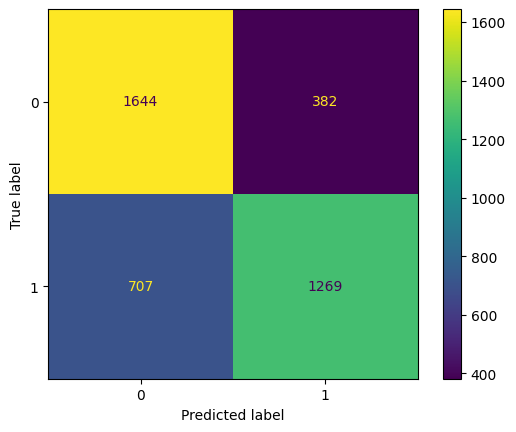

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from matplotlib import pyplot as plt
cm = confusion_matrix(y_test, y_pred_final)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

In [ ]:
type(y_test), len(y_test)

(numpy.ndarray, 4002)

In [ ]:
y_pred_final = np.array(y_pred_final)

In [ ]:
y_pred_final[y_pred_final==0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("random_accuracy = ", 1644/(1644+382))
print("AES accuracy = ",1269/(1269+707))

random_accuracy =  0.8114511352418559
AES accuracy =  0.6422064777327935
